# <b> Chapter 8 

In [325]:
from matplotlib.collections import LineCollection
from typing import Callable, List
import math
import random
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(23)
random.seed(23)

In [326]:
%%capture
%run ./ch_4.ipynb import Vector

## Estimating the Gradient

- Newton's difference quotient (also known as a first-order divided difference):

$$
{\displaystyle f'(a)=\lim _{h\to 0}{\frac {f(a+h)-f(a)}{h}}}
$$

In [327]:
# Defining the derivative and log functions


def divided_difference(f: Callable, a: float, h: float) -> float:
    """Estimates the derivative of a function by approximation"""
    return (f(a + h) - f(a)) / h


def log_derivative(x: float) -> float:
    """Calculates the derivative of a log"""
    return 1 / (x * math.log(1 / 2))


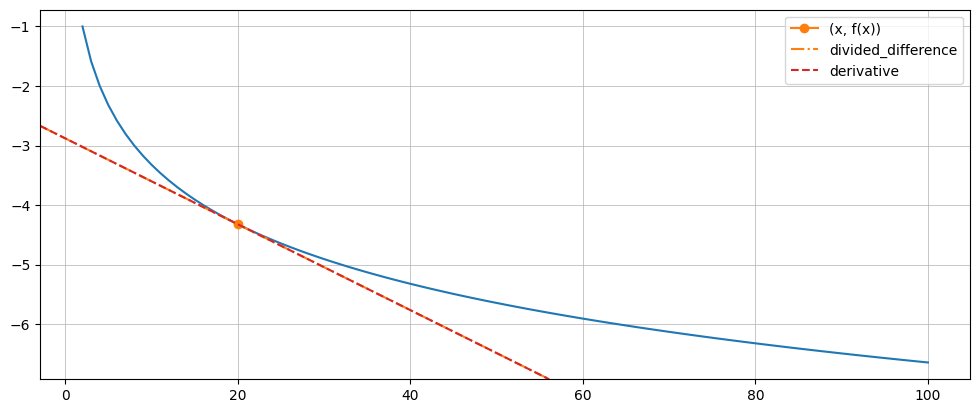

In [328]:
# Example of an approximation a derivative of f(20) = log_1/2(20) with the difference quotient


h = 1e-2
b = 1 / 2
log = lambda x: math.log(x, b)
xs = [x for x in range(100, 1, -1)]
ys = [log(x) for x in xs]


plt.figure().set_figwidth(12)
plt.plot(xs, ys)
plt.plot(20, log(20), marker="o", label="(x, f(x))")
plt.axline(
    [20, log(20)],
    slope=divided_difference(log, 20, h),
    c="C1",
    label="divided_difference",
    linestyle="-.",
)
plt.axline(
    [20, log(20)],
    slope=log_derivative(20),
    c="C3",
    label="derivative",
    linestyle="--",
)

plt.grid(linewidth=0.5)
plt.legend()
plt.show()

## Using the Gradient

In [329]:
# Defining some gradient and generic functions 

def partial_divided_difference(f: Callable, v: Vector, i: int, h: float) -> float:
    """Returns the divided difference of the i-th quotient of f at v"""
    w = [*v]
    w[i] += h
    return (f(*w) - f(*v)) / h


def estimate_gradient(f: Callable, v: Vector, h: float) -> List:
    """Repeatedly estimates the gradients for each point of v"""
    return [partial_divided_difference(f, v, i, h) for i in range(len(v))]



def conic(x: float, y: float) -> float:
    """Calculates the z coord to make a cone"""
    return 4 - ((x**2) + (y**2))


def to_cone(v: Vector) -> Vector:
    x, y = v
    return Vector([x, y, conic(*v)])

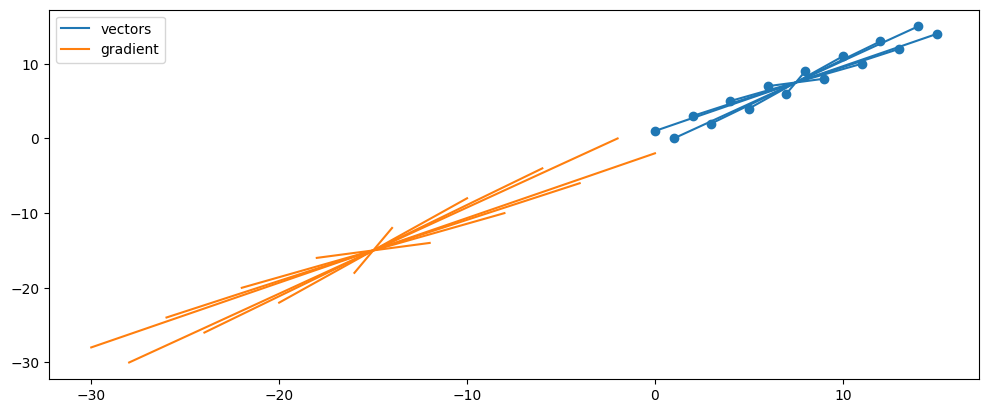

In [330]:
nums = [x for x in range(0, 16)]
vectors = [Vector([x, y]) for x, y in zip(nums, nums[::-1])]
gradients = [estimate_gradient(conic, v, 1e-12) for v in vectors]
plt.figure().set_figwidth(12)
plt.plot(*vectors, c='C0', marker='o')
plt.plot([], [], c='C0', label='vectors')
plt.plot(*gradients, c='C1')
plt.plot([], [], c='C1', label='gradient')
plt.legend()
plt.show()

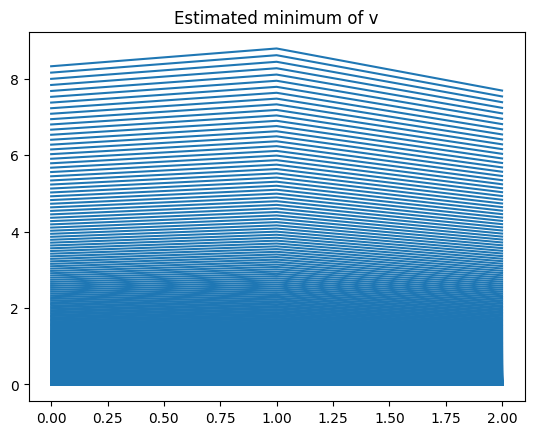

In [331]:
# NOTE: Here I just made some adaptations from the Author's code to fit my Vector class.

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""    
    assert len(v) == len(gradient)
    step = gradient.multiply(step_size)
    return v.vect_sum(step)



v = Vector([random.uniform(-10, 10) for i in range(3)])
for epoch in range(500):
    grad = v.multiply(2)
    v = gradient_step(v, grad, -0.01)
    plt.plot(v, c='C0')

plt.title('Estimated minimum of v')
plt.show()
assert v.distance(Vector([0, 0, 0])) < 0.001

## Using Gradient Descent to Fit Models

In [334]:
# Defining a generic function for the predictions

def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept # The prediction of the model.
    error = (predicted - y)
    squared_error = error ** 2 # We'll minimize squared error
    grad = [2 * error * x, 2 * error] # using its gradient.
    return grad

def generic_polynomial(x: float):
    """Defines a generic polynomial function for the predictions"""
    return 2 * (x - 2) * 2 * (x + 2) * (x + 1)

xs = [generic_polynomial(x) for x in range(-100, 101)]
